# Problem Statement:
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 
Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:

-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. 

There is need to build a model that can differentiate between comments and its categories.  

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
import re, spacy, string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\Lab\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Lab\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text))


# Initial Analysis

In [3]:
#Read the csv file into dataframe df
df = pd.read_csv("train.csv")
print(df.shape)

(159571, 8)


- The train dataset size is large having 159571 and 8 rows
- The dataset size is too large it might create problem while processing where it suspect it will run short of memory and may give memory errors.

In [4]:
df.head(12)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 


In [5]:
print(df.dtypes)

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


 - ID and commnet_text variable is object  data type column and rest all are Int data type

In [7]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

- There is no missing value present in train set

In [8]:
df = df.reindex(np.random.permutation(df.index))

- The df.reindex code will shuffle the indices initially, so that later splitting dataset into training and testing will give fairer results

In [9]:
comment = df['comment_text']
print(comment.head())
comment = comment.to_numpy()

148667    "\n\n SFD notification \n\nThis is a notificat...
92193     Let the vandals off scot-free, punish the peop...
108682    "Thanks for the MFD help. It slipped my mind. ...
94261     The edit is most definitely not helpful. Sea l...
79267     you erased the part of the status of the Roman...
Name: comment_text, dtype: object


In [10]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [11]:
label = df[['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']]
print(label.head())
label = label.to_numpy()

        malignant  highly_malignant  rude  threat  abuse  loathe
148667          0                 0     0       0      0       0
92193           0                 0     0       0      0       0
108682          0                 0     0       0      0       0
94261           0                 0     0       0      0       0
79267           0                 0     0       0      0       0


# Finding the frequency of occurence of multilabelled data
- ct1 counts samples having atleast one label
- ct2 counts samples having 2 or more than 2 labels

In [12]:
ct1,ct2 = 0,0
for i in range(label.shape[0]):
    ct = np.count_nonzero(label[i])
    if ct :
        ct1 = ct1+1
    if ct>1 :
        ct2 = ct2+1
print(ct1)
print(ct2)

16225
9865


# Data Visualization

average length of comment: 394.139


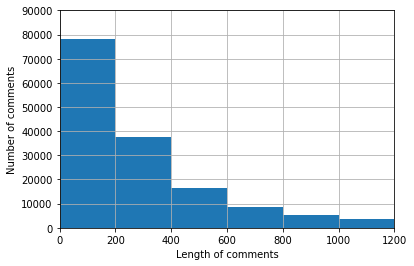

In [13]:
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

- Analysisng the no. of comments having lengths varying from 0 to 1200

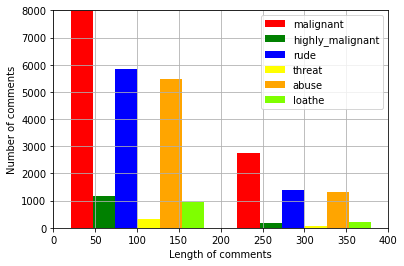

In [19]:
z = np.zeros(label.shape)
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label[ix][0] :
        z[ix][0] = l
    if label[ix][1] :
        z[ix][1] = l
    if label[ix][2] :
        z[ix][2] = l
    if label[ix][3] :
        z[ix][3] = l
    if label[ix][4] :
        z[ix][4] = l
    if label[ix][5] :
        z[ix][5] = l
labelsplt = ['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
color = ['red','green','blue','yellow','orange','chartreuse']
plt.hist(z,bins = bins,label = labelsplt,color = color)
plt.axis([0, 400, 0, 8000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')
plt.legend()
plt.grid(True)
plt.show()

- From the first visualization we can see legth of comment is large for the value 0-200 and thereafter it started to decrease from 200-400 and so on. the length of comment decrease for higher value, hence it is advisable to have small size of comments for processing.

- From the second figure we can observe that:

- Malignant : 	length of comments is large for the till 50
- Highly Malignant: 	very less from 50-25
- rude:		 high from value 25 to 100, but less then malignat
- threat:		 very less
- abuse: 		high fro value 125 to 150 but less then rude and malignant.
- loathe :		 not so large, but greater then the value of threat.

- All above length of comments is started decreasing from the value 200 till 400 as the length of comments value increases.


# Univariate Countplot :
The dataset has target column and binary labelled multiclass column where the severity of toxic comments is classified as malignant, highly malignant etc as shown below, these toxic columns is further binary classified as 0 and 1 where 1 indicate the comment is toxic and falls into one of the severity of toxic class below.
Further With the help of countplot we can see all the toxic multiclass columns which has binary class is highly imbalanced and because of this we cannot trust only on accuracy and AUC score metric for selecting the best model, Hence hamming and loss loss metric is also included for analysis which will correctly help to select the best model based on analysis of all the metrics.


0    144277
1     15294
Name: malignant, dtype: int64

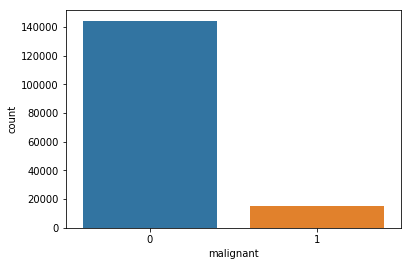

In [5]:
sns.countplot(df['malignant'])
df['malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

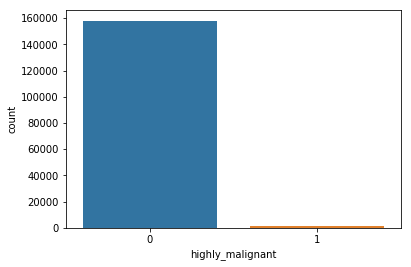

In [6]:
sns.countplot(df['highly_malignant'])
df['highly_malignant'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

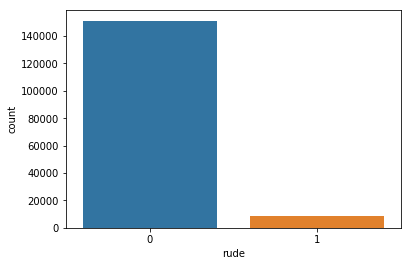

In [7]:
sns.countplot(df['rude'])
df['rude'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

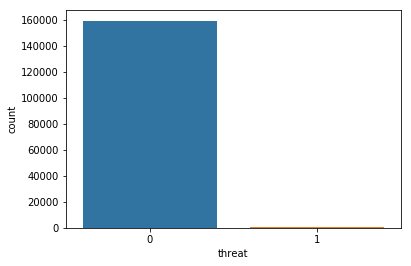

In [8]:
sns.countplot(df['threat'])
df['threat'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

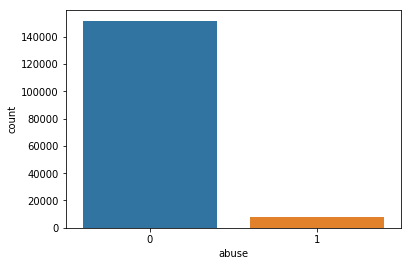

In [9]:
sns.countplot(df['abuse'])
df['abuse'].value_counts()

0    6322
1      61
Name: loathe, dtype: int64

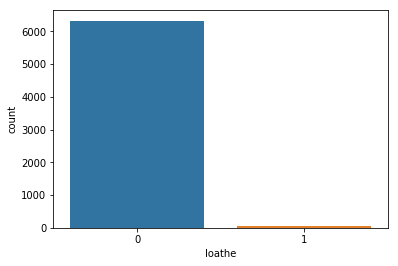

In [144]:
sns.countplot(df['loathe'])
df['loathe'].value_counts()

# Wordcloud on Training Set:
Wordcloud : Is a powerful way to visualise what the audience think about the Topic, which is a collection of a cluster of words occurring more frequently. The bigger and bolder the words the words appears, the more often it is voted by the audience. Trainset : From partitioned train set we can see following(article, Wikipedia, known, One etc) words is most frequently occurred.
Testset : And from partitioned testset following words is most frequently occurred (article, think, source, Thank, page etc.)


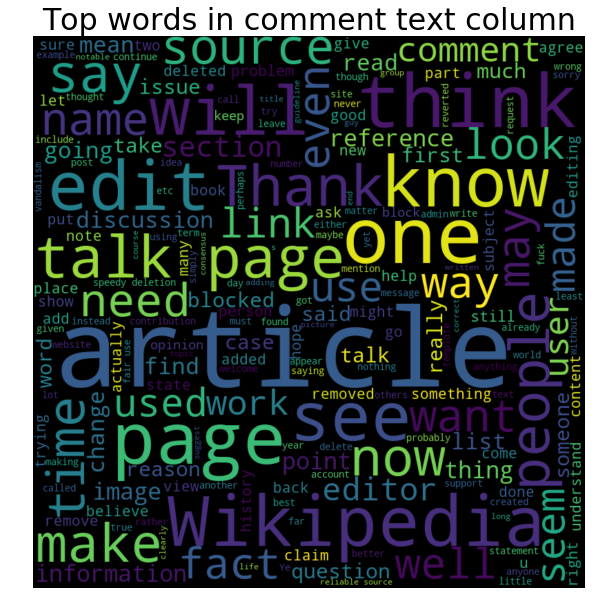

In [11]:
from wordcloud import WordCloud,STOPWORDS
def wordCloud_generator(df, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(df.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()
wordCloud_generator(df['comment_text'], title="Top words in comment text column")

# Partitioning Trainset :
The train and test dataset size is reduced and partioned to smaller size inorder to process the smaller size data for further analysis and model building as system was not able to process such large size data and was throwing memory error.

In [4]:
import pandas as pd
df = pd.read_csv("train.csv")
 
# no of csv files with row size
k = 1
size = 6383
 
for i in range(k):
    df = df[size*i:size*(i+1)]
    df.to_csv(f'train_{i+1}.csv', index=False)
    
    
df_1 = pd.read_csv("train_1.csv")
print(df_1) 

                    id                                       comment_text  \
0     0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1     000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2     000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3     0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4     0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                ...                                                ...   
6378  11145097289d5764              Ciao \n\nYou can check my respond. []   
6379  11152dd6a37d0b98  Stooges are the nickname for the fans on Murph...   
6380  1115683a6453d9c3  "\n\nI mean, the article title is ""ionized br...   
6381  1115bf731675e9b5  "\n\n edit \nGwen, I edited the ""personal att...   
6382  111602e2bbba12e4  Hi \n\nDear Sikhs,\n\nI would request all you ...   

      malignant  highly_malignant  rude  threat  abuse  loathe  
0         

In [5]:
df_1 = pd.read_csv("train_1.csv")
df_1.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


- Initial Analysis on partitioned trained set 'train_1,csv' done below.

In [6]:
print(df_1.dtypes)

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6383 entries, 0 to 6382
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                6383 non-null   object
 1   comment_text      6383 non-null   object
 2   malignant         6383 non-null   int64 
 3   highly_malignant  6383 non-null   int64 
 4   rude              6383 non-null   int64 
 5   threat            6383 non-null   int64 
 6   abuse             6383 non-null   int64 
 7   loathe            6383 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 399.1+ KB


In [8]:
df_1.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

# Removing Stopwords :

Stopwords :  Stop words are those words that are frequently used in both written and verbal communication and thereby do not have either a positive/negative impact on our statement and also do not convey any useful meaning and hence can be directly removed.


In [10]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [11]:
from nltk.corpus import stopwords
stopwords_ = stopwords.words('english')
stopwords_[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
print(stopwords_)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
df_1.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [14]:
print(df_1.loc[(df_1.malignant!=0)&(df_1.malignant!=1)].shape[0])
print(df_1.loc[(df_1.highly_malignant!=0)&(df_1.highly_malignant!=1)].shape[0])
print(df_1.loc[(df_1.rude!=0)&(df_1.rude!=1)].shape[0])
print(df_1.loc[(df_1.threat!=0)&(df_1.threat!=1)].shape[0])
print(df_1.loc[(df_1.abuse!=0)&(df_1.abuse!=1)].shape[0])
print(df_1.loc[(df_1.loathe!=0)&(df_1.loathe!=1)].shape[0])

0
0
0
0
0
0


In [15]:
print(df_1.loc[df_1.malignant==1].shape[0])
print(df_1.loc[df_1.highly_malignant==1].shape[0])
print(df_1.loc[df_1.rude==1].shape[0])
print(df_1.loc[df_1.threat==1].shape[0])
print(df_1.loc[df_1.abuse==1].shape[0])
print(df_1.loc[df_1.loathe==1].shape[0])

638
66
346
24
334
61


- Finding out number of toxic comments in each multiclass columns shown above.

# Stemming:
Stemming is the process of reducing a word to its stem or root format. for example three words, “branched”, “branching” and “branches”. They all can be reduced to the same word “branch”. After all, all the three convey the same idea of something separating into multiple paths or branches. Again, this helps reduce complexity while retaining the essence of meaning carried by these three words.This helps in achieving the training process with a better  accuracy.The snowball stemmer is applied to the target column comment.text through df.apply method.

In [16]:
stemmer = SnowballStemmer(language='english')
def simple_clear(text):
    text = text.lower()
    text = re.sub("[^a-zA-Z]", ' ', text)
    text = re.sub('<.*?>','',text)
    text = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", text)
    text = re.sub('\[|\(.*\]|\)','', text) 
    text = re.sub("(\\W)"," ",text) 
    text = re.sub('\S*\d\S*\s*','', text)  
    text = text.split()
    text = [stemmer.stem(word) for word in text if not word in set(stopwords_)]
    text = ' '.join(text)
    return text

# Separating y dataset which has all multiclass labels or columns

In [17]:
y = df_1.drop(['id','comment_text'],axis = 1)
y.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


# Correltion plot on y dataframe of multiclass labels

In [18]:
ycorr=y.corr()
ycorr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.306726,0.660722,0.167283,0.648831,0.278656
highly_malignant,0.306726,1.000000,0.399602,0.120243,0.351539,0.165064
rude,0.660722,0.399602,1.000000,0.132259,0.723638,0.332078
threat,0.167283,0.120243,0.132259,1.000000,0.123504,0.151830
abuse,0.648831,0.351539,0.723638,0.123504,1.000000,0.360178
loathe,0.278656,0.165064,0.332078,0.151830,0.360178,1.000000


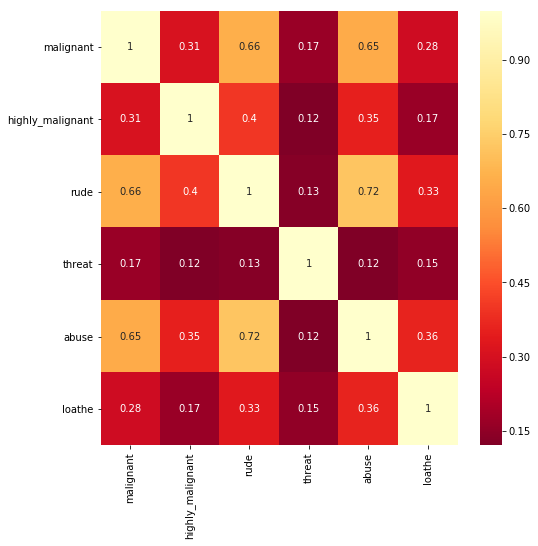

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(ycorr,cmap='YlOrRd_r', annot=True)

- The trainset is separated into X & y, where X is a target column 'comment_text' and y dataset contains toxic multiclass columns as shown below in corr plot, where we can see :

- malignant shows positive correlation with abuse and rude column.
- rude shows positive correlation with abuse and malignant.
- abuse shows positive correlation with rude and malignant.


In [20]:
df_1['clean'] = df_1['comment_text'].apply(simple_clear)
df_1['clean'][:5]

0    explan edit made usernam hardcor metallica fan...
1    aww match background colour seem stuck thank t...
2    hey man realli tri edit war guy constant remov...
3    make real suggest improv wonder section statis...
4                           sir hero chanc rememb page
Name: clean, dtype: object

- Stemming function 'simple_clear' is applied to target column to clean target column similarly it is applied on partitioned test sets

In [21]:
df_1['clean'].value_counts()

# Initial Analysis on Partitioned test data

In [22]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [23]:
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [24]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [25]:
df_test['comment_text']

0         Yo bitch Ja Rule is more succesful then you'll...
1         == From RfC == \n\n The title is fine as it is...
2         " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3         :If you have a look back at the source, the in...
4                 I don't anonymously edit articles at all.
                                ...                        
153159    . \n i totally agree, this stuff is nothing bu...
153160    == Throw from out field to home plate. == \n\n...
153161    " \n\n == Okinotorishima categories == \n\n I ...
153162    " \n\n == ""One of the founding nations of the...
153163    " \n :::Stop already. Your bullshit is not wel...
Name: comment_text, Length: 153164, dtype: object

# WordCloud on Testset

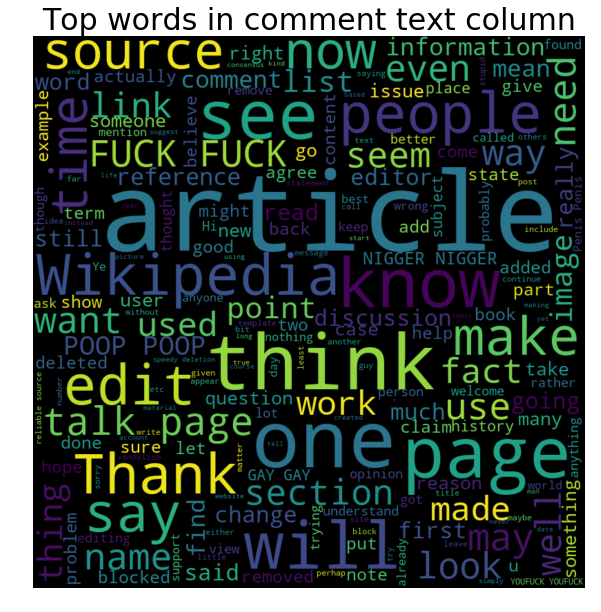

In [26]:
from wordcloud import WordCloud,STOPWORDS
def wordCloud_generator(df, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(df.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()
wordCloud_generator(df_test['comment_text'], title="Top words in comment text column")

# Testset Partitioning

In [27]:
df_test = pd.read_csv("test.csv")
 
# no of csv files with row size
j = 1
size = 6962
 
for i in range(j):
    df_test = df_test[size*i:size*(i+1)]
    df_test.to_csv(f'test_{i+1}.csv', index=False)
 
df_1_testset = pd.read_csv("test_1.csv")
print(df_1_testset) 

                    id                                       comment_text
0     00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1     0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2     00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3     00017563c3f7919a  :If you have a look back at the source, the in...
4     00017695ad8997eb          I don't anonymously edit articles at all.
...                ...                                                ...
6957  0bbd699cc48288d3  ...... What do you comment about the uncivil i...
6958  0bbd9ded49106cc5  == Results of the Romanian legislative electio...
6959  0bbe4d7cb232ad6b  " \n :Then make whatever changes are necessary...
6960  0bbe7c4df49298c3  , 21 January 2006 (UTC) \n\n :::: Yeah, in fac...
6961  0bbefdffc4b4a2ff  & the pdf downloadable doc http://web.mac.com/...

[6962 rows x 2 columns]


In [28]:
df_test = pd.read_csv("test.csv")
 
# no of csv files with row size
l = 1
size = 8000
 
for i in range(l):
    df_test = df_test[size*i:size*(i+1)]
    df_test.to_csv(f'test2_{i+1}.csv', index=False)
    
    
df_2_testset = pd.read_csv("test2_1.csv")
print(df_2_testset) 

                    id                                       comment_text
0     00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1     0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2     00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3     00017563c3f7919a  :If you have a look back at the source, the in...
4     00017695ad8997eb          I don't anonymously edit articles at all.
...                ...                                                ...
7995  0d6ba6eab98ce539  "  \n \n  WebMySpacePeopleMusicMusic VideosBlo...
7996  0d6be662d82bdc12  " \n\n  \n == Fuck you == \n\n People really d...
7997  0d6ce44f05944611  " \n :This is a common misconception. Remember...
7998  0d6d78de66f9bb87  " \n :Oops, almost forgot! Happy Thanksgiving!  "
7999  0d6dacfb9e3db45e  ::::::Agree with above assessments. No use to ...

[8000 rows x 2 columns]


In [29]:
df_1_testset.isnull().sum()

id              0
comment_text    0
dtype: int64

In [30]:
df_2_testset.isnull().sum()

id              0
comment_text    0
dtype: int64

# Cleaning Partitioned Test  Set 1 & Test set 2

In [31]:
df_1_testset['clean'] = df_1_testset['comment_text'].apply(simple_clear)
df_1_testset['clean'][:5]

0    yo bitch ja rule succes ever what hate sad mof...
1                                    rfc titl fine imo
2                             sourc zaw ashton lapland
3    look back sourc inform updat correct form gues...
4                                   anonym edit articl
Name: clean, dtype: object

In [32]:
df_2_testset['clean'] = df_2_testset['comment_text'].apply(simple_clear)
df_2_testset['clean'][:5]

0    yo bitch ja rule succes ever what hate sad mof...
1                                    rfc titl fine imo
2                             sourc zaw ashton lapland
3    look back sourc inform updat correct form gues...
4                                   anonym edit articl
Name: clean, dtype: object

In [33]:
df_1_testset['clean'].shape

(6962,)

- Partioned testset 1 is of size with 6962 rows

In [34]:
df_2_testset['clean'].shape

(8000,)

- Partitioned testset size 2 is of 8000 rows

# Separating Trainset Into X & y

In [35]:
X_raw = df_1['clean']
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42,shuffle = True)

# TFID Vectorizer : 
As target column 'comment_text'  contains text which needs to be converted into numbers to process and build the model, So TfidfVectorizer is used as one of the method to convert text into numbers. tf-idf is used to classify documents, ranking in search engine. tf: term frequency(count of the words present in document from its own vocabulary), idf: inverse document frequency(importance of the word to each document).The method addresses the fact that all words should not be weighted equally, using the weights to indicate the words that are most unique to the document, and best used to characterize it.TfidfVectorizer Transforms text to feature vectors that can be used as input to estimator. Each sentence is a vector. In each vector the numbers (weights) represent features tf-idf score, So tf-idf creates a set of its own vocabulary from the entire set of documents. Which is seen in first line of output. (for better understanding I have sorted it) where vocabulary_ Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index.


- All partitioned train and testset is vectorized to convert text into numbers for building models below.

In [36]:
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',                 
    token_pattern=r'\w{1,}',    
    ngram_range=(1, 3),         
    stop_words = stopwords_,
    sublinear_tf=True)

word_vectorizer.fit(X_train)

TfidfVectorizer(ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

In [37]:
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',                 
    token_pattern=r'\w{1,}',    
    ngram_range=(1, 3),         
    stop_words = stopwords_,
    sublinear_tf=True)

word_vectorizer.fit(X_raw)

TfidfVectorizer(ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

# Separating Testset into X test

In [38]:
X_raw_test = df_1_testset['clean']

In [39]:
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',                 
    token_pattern=r'\w{1,}',    
    ngram_range=(1, 3),         
    stop_words = stopwords_,
    sublinear_tf=True)

word_vectorizer.fit(X_raw_test)

TfidfVectorizer(ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

In [40]:
X_raw_test2 = df_2_testset['clean']

In [41]:
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',                 
    token_pattern=r'\w{1,}',    
    ngram_range=(1, 3),         
    stop_words = stopwords_,
    sublinear_tf=True)

word_vectorizer.fit(X_raw_test2)

TfidfVectorizer(ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

In [42]:
X_raw_test.isnull().sum()

0

In [43]:
X_raw_test2.isnull().sum()

0

In [44]:
X_train_transformed = word_vectorizer.transform(X_train)
X_test_transformed = word_vectorizer.transform(X_test)

In [45]:
X_raw_transformed = word_vectorizer.transform(X_raw)

In [46]:
X_raw_test_transformed = word_vectorizer.transform(X_raw_test)

In [47]:
X_raw_test_transformed2 = word_vectorizer.transform(X_raw_test2)

In [48]:
X_raw_transformed

<6383x407899 sparse matrix of type '<class 'numpy.float64'>'
	with 232452 stored elements in Compressed Sparse Row format>

In [49]:
X_raw_test_transformed

<6962x407899 sparse matrix of type '<class 'numpy.float64'>'
	with 548538 stored elements in Compressed Sparse Row format>

In [50]:
X_train_transformed

<5106x407899 sparse matrix of type '<class 'numpy.float64'>'
	with 185047 stored elements in Compressed Sparse Row format>

In [51]:
X_raw_test_transformed2

<8000x407899 sparse matrix of type '<class 'numpy.float64'>'
	with 628907 stored elements in Compressed Sparse Row format>

In [52]:
y_train

,malignant,highly_malignant,rude,threat,abuse,loathe
2574,0,0,0,0,0,0
3100,0,0,0,0,0,0
4607,0,0,0,0,0,0
6020,0,0,0,0,0,0
471,0,0,0,0,0,0
...,...,...,...,...,...,...
3772,0,0,0,0,0,0
5191,0,0,0,0,0,0
5226,0,0,0,0,0,0
5390,0,0,0,0,0,0


In [53]:
print('X_train_transformed', X_train_transformed.shape)
print('y_train', y_train.shape)
print('X_test_transformed', X_test_transformed.shape)
print('y_test', y_test.shape)

X_train_transformed (5106, 407899)
y_train (5106, 6)
X_test_transformed (1277, 407899)
y_test (1277, 6)


# Hamming & Log Loss Common Python Function for ML Algo :
Hamming and Log Loss function is created which is applied on all ML Algorithm to find the values of hamming and log loss

In [54]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
def evaluate_score(Y_test,predict): 
    loss = hamming_loss(y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(y_test,predict)
    except :
        loss = log_loss(y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

# BibaryRelevance-SVM & MultinomialNB Classifier:

- Basically, there are three methods to solve a multi-label classification problem, namely:
1. Problem Transformation.
2. Adapted Algorithm.
3. Ensemble approaches.

- In Problem Transformation Methods there are three methods 1. Binary Relevance, 2. Classifier Chains, 3. Label Powerset



- 1. Binary Relevance :  This is the simplest technique, which basically treats each label as a separate single class classification problem.This method does not take into account the interdependence of labels. Each label is solved separately like a single label classification problem. This is the simplest approach to be applied.

- For example, let us consider a case as shown below. We have the data set like this, where X is the independent feature and Y’s are the target variable.

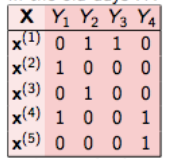


- In binary relevance, this problem is broken into 4 different single class classification problems
as shown in the figure below.

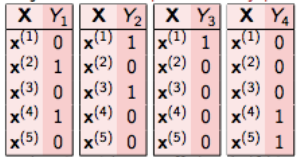

In [ ]:
#create and fit classifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
classifier.fit(X_train_transformed, y_train)
predictions = classifier.predict(X_test_transformed)
evaluate_score(y_test,predictions)

# BinaryRelevance-MultinomialNB Classifier

In [56]:
from sklearn.naive_bayes import MultinomialNB
classifier = BinaryRelevance(classifier = MultinomialNB(), require_dense = [False, True])
classifier.fit(X_train_transformed, y_train)
predictionsNB = classifier.predict(X_test_transformed)
evaluate_score(y_test,predictionsNB)

Hamming_loss : 3.9415296267293134
Accuracy : 88.72357086922474
Log_loss : 0.55195492900179


In [57]:
X_raw.shape

(6383,)

In [58]:
X_raw_test.shape

(6962,)

In [59]:
X_raw_test2.shape

(8000,)

In [60]:
y.shape

(6383, 6)

In [61]:
X_raw.dtypes

dtype('O')

In [62]:
X_raw_test.dtypes

dtype('O')

In [63]:
X_raw_test2.dtypes

dtype('O')

In [64]:
y.dtypes

malignant           int64
highly_malignant    int64
rude                int64
threat              int64
abuse               int64
loathe              int64
dtype: object

# Part -2 Model Building:

- The following Classification Ml Algorithm used to build the model (logistic, Decisiontree, RandomForest,K-NN,XGBoost, Bianryrelevance-SVM, Binaryrelevance-MultinomialNB.)

- K-fold Cross Validation and halvingGridsearchCV used to tune hyper parameter on to top above selected Algorithm( To Prevent Over-fitting and Under-fitting of the model).

- As the multiclass column is highly class imbalanced where we cannot depend only on accuracy/AUC Score, hence humming & log loss is also used to select best Model.

- The best model which will perform well is logistic regression as it shows low humming loss and high accuracy, AUC score on y_test_malignant as well on y-test multiclass labels.


# K-Fold CV

In [65]:
from sklearn.model_selection import cross_val_score  # Importing cross val score
from sklearn.model_selection import KFold  # Imporing Kfold CV

In [66]:
cross_validation=KFold(5, shuffle =True) 
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [67]:
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV

# Logistic Regression

In [68]:
parameter = {'penalty': ['l2'],
             'C': [0.5,0.75,1],
             'class_weight': ['balanced',None],
             'solver': ['liblinear']}

In [69]:
cross_validation=KFold(5, shuffle =False) 

In [70]:
GCV=HalvingGridSearchCV(LogisticRegression(),parameter,cv=cross_validation)

In [71]:
GCV.fit(X_train_transformed,y_train.malignant)

HalvingGridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                    estimator=LogisticRegression(),
                    param_grid={'C': [0.5, 0.75, 1],
                                'class_weight': ['balanced', None],
                                'penalty': ['l2'], 'solver': ['liblinear']},
                    refit=<function _refit_callable at 0x000000001DB3C620>)

In [81]:
GCV.best_params_
# Best Parameter is selected from grid search CV which is 
#'criterion': 'gini','max_depth': 9,'max_features': 'sqrt','splitter': 'best'

{'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

In [81]:
LR = LogisticRegression(C = 0.5, penalty='l2', solver = 'liblinear',class_weight = 'balanced')
LR.fit(X_train_transformed,y_train.malignant)
y_pred_LR = LR.predict(X_test_transformed)
print(f'Roc_auc at test:  = {roc_auc_score(y_test.malignant,y_pred_LR)}')
acc=accuracy_score(y_test.malignant,y_pred_LR)
print(acc*100)

Roc_auc at test:  = 0.835973584761614
94.59671104150353


# OneVsRestClassifier(Log Regn) : To predict all multiclass labels on y_test 

In [73]:
LROne=  LogisticRegression(C = 0.5, penalty='l2', solver = 'liblinear',class_weight = 'balanced')
classifier_ovr_LROne = OneVsRestClassifier(LROne)
classifier_ovr_LROne.fit(X_train_transformed, y_train)
y_LROne_classifer_over = classifier_ovr_LROne.predict(X_test_transformed)
print("ROC AUC Score Test:", roc_auc_score(y_test, y_LROne_classifer_over))
print(classification_report(y_test, y_LROne_classifer_over))

ROC AUC Score Test: 0.8026535100900768
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       138
           1       0.28      0.64      0.39        11
           2       0.92      0.74      0.82        74
           3       1.00      0.50      0.67         2
           4       0.66      0.62      0.64        69
           5       0.38      0.50      0.43        10

   micro avg       0.72      0.68      0.70       304
   macro avg       0.67      0.62      0.61       304
weighted avg       0.76      0.68      0.71       304
 samples avg       0.06      0.07      0.06       304



C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
evaluate_score(y_test,y_LROne_classifer_over)

Hamming_loss : 2.3101018010963195
Accuracy : 89.89819890368051
Log_loss : 1.2364992500487058


# Prediction on Test Data Part 1 for Logistic Regression

In [75]:
LR = LogisticRegression(C = 0.5, penalty='l2', solver = 'liblinear',class_weight = 'balanced')
classifier_ovr_LROne = OneVsRestClassifier(LROne)
classifier_ovr_LROne.fit(X_raw_transformed, y) 
pred_on_testdataLR1 = classifier_ovr_LROne.predict(X_raw_test_transformed)
print(pred_on_testdataLR1)

[[1 0 1 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


# Prediction on Test Data Part 2 for Logistic Regression

In [76]:
LR = LogisticRegression(C = 0.5, penalty='l2', solver = 'liblinear',class_weight = 'balanced')
classifier_ovr_LROne = OneVsRestClassifier(LROne)
classifier_ovr_LROne.fit(X_raw_transformed, y) 
pred_on_testdata2LR = classifier_ovr_LROne.predict(X_raw_test_transformed2)
print(pred_on_testdata2LR)

[[1 0 1 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [77]:
pred_on_testdata2LR = pd.DataFrame(pred_on_testdata2LR, columns = ['malignant','highly_malignant','rude','threat','abuse','loathe'])

In [78]:
pred_on_testdata2LR

,malignant,highly_malignant,rude,threat,abuse,loathe
0,1,0,1,0,1,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
7995,0,0,0,0,0,0
7996,1,0,1,0,1,0
7997,0,0,0,0,0,0
7998,0,0,0,0,0,0


In [79]:
pred_on_testdata2LR.to_csv('pred_on_testdata2LR.csv')

# AUC-ROC Score & Curve for Logistic Regression:

In [82]:
y_pred_prob= LR.predict_proba(X_test_transformed)[:,1]
fpr,tpr,thresholds=roc_curve(y_test.malignant, y_pred_LR,pos_label= 1)

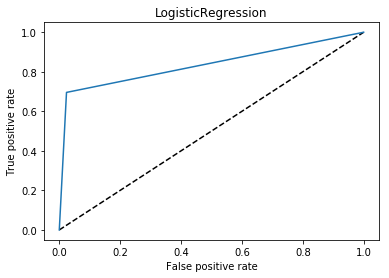

0.835973584761614

In [83]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()
auc_score=roc_auc_score(y_test.malignant,LR.predict(X_test_transformed))
auc_score

In [84]:
auc_score=roc_auc_score(y_test, classifier_ovr_LROne.predict(X_test_transformed))
auc_score

0.994811480788453

# Decision Tree Classifier

In [85]:
import numpy as np
parameter = {'max_depth' : np.arange(2,10),
            'criterion':['gini','entropy'],
            'splitter' : ['best', 'random'],
            'max_features' : ['auto','sqrt','log2']}

In [86]:
cross_validation=KFold(5, shuffle =False) 

In [87]:
GCV=HalvingGridSearchCV(DecisionTreeClassifier(),parameter,cv=cross_validation)

In [88]:
GCV.fit(X_train_transformed,y_train.malignant)

HalvingGridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                    estimator=DecisionTreeClassifier(),
                    param_grid={'criterion': ['gini', 'entropy'],
                                'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                'max_features': ['auto', 'sqrt', 'log2'],
                                'splitter': ['best', 'random']},
                    refit=<function _refit_callable at 0x000000001DB3C620>)

In [89]:
GCV.best_params_
# Best Parameter is selected from grid search CV which is 
#'criterion': 'gini','max_depth': 9,'max_features': 'sqrt','splitter': 'best'

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [90]:
DTC = DecisionTreeClassifier(criterion = 'gini', max_depth = 6,max_features='log2',splitter='best')
DTC.fit(X_train_transformed,y_train.malignant)
y_pred_DTC = DTC.predict(X_test_transformed)
print(f'Roc_auc at test:  = {roc_auc_score(y_test.malignant,y_pred_DTC)}')
acc=accuracy_score(y_test.malignant,y_pred_DTC)
print(acc*100)

Roc_auc at test:  = 0.5
89.19342208300705


In [91]:
DTCOne = DecisionTreeClassifier(criterion = 'gini', max_depth = 6,max_features='log2',splitter='best')
classifier_ovr_DTCOne = OneVsRestClassifier(DTCOne)
classifier_ovr_DTCOne.fit(X_train_transformed, y_train)
y_DTCOne_classifer_over = classifier_ovr_DTCOne.predict(X_test_transformed)
print("ROC AUC Score Test:", roc_auc_score(y_test, y_DTCOne_classifer_over))
print(classification_report(y_test,  y_DTCOne_classifer_over))

ROC AUC Score Test: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        74
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00        10

   micro avg       0.00      0.00      0.00       304
   macro avg       0.00      0.00      0.00       304
weighted avg       0.00      0.00      0.00       304
 samples avg       0.00      0.00      0.00       304



C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classificat

In [92]:
evaluate_score(y_test,y_DTCOne_classifer_over)

Hamming_loss : 3.967632471939441
Accuracy : 88.72357086922474
Log_loss : 0.42654258312085264


# AUC ROC Curve & Score Logistic Regression

In [93]:
y_pred_prob= DTC.predict_proba(X_test_transformed)[:,1]
fpr,tpr,thresholds=roc_curve(y_test.malignant, y_pred_DTC,pos_label= 1)

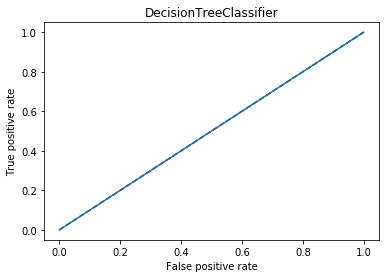

0.5

In [94]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()
auc_score=roc_auc_score(y_test.malignant,DTC.predict(X_test_transformed))
auc_score

In [95]:
auc_score=roc_auc_score(y_test, classifier_ovr_DTCOne.predict(X_test_transformed))
auc_score

0.5

# Prediction on Test Data Partition 1 Decision Tree

In [96]:
DTCOne = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,max_features='auto',splitter='random')
classifier_ovr_DTCOne = OneVsRestClassifier(DTCOne)
classifier_ovr_DTCOne.fit(X_raw_transformed, y)
predxtr_on_testdataDTCOne = classifier_ovr_DTCOne.predict(X_raw_test_transformed)
print(predxtr_on_testdataDTCOne)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


# Prediction on Test Data Partition 2 Decision Tree

In [97]:
DTCOne = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,max_features='auto',splitter='random')
classifier_ovr_DTCOne = OneVsRestClassifier(DTCOne)
classifier_ovr_DTCOne.fit(X_raw_transformed, y)
predxtr_on_testdataDTCOne = classifier_ovr_DTCOne.predict(X_raw_test_transformed2)
print(predxtr_on_testdataDTCOne)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


# Random Forest Classifier

In [98]:
import numpy as np
parameter = {'max_depth' : [2,4,6,8,10],
            'criterion':['gini','entropy'],
            'n_estimators' : [40],
            'max_features' : ['auto','sqrt','log2']}

In [99]:
cross_validation=KFold(5, shuffle =False) 

In [100]:
GCV=HalvingGridSearchCV(RandomForestClassifier(),parameter,cv=cross_validation)

In [101]:
GCV.fit(X_train_transformed,y_train.malignant)
# Grid search CV applied to the Training Dataset 

HalvingGridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                    estimator=RandomForestClassifier(),
                    param_grid={'criterion': ['gini', 'entropy'],
                                'max_depth': [2, 4, 6, 8, 10],
                                'max_features': ['auto', 'sqrt', 'log2'],
                                'n_estimators': [40]},
                    refit=<function _refit_callable at 0x000000001DB3C620>)

In [102]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 40}

In [103]:
RFC = RandomForestClassifier(criterion = 'entropy', max_depth = 10,max_features='sqrt',n_estimators= 40)
RFC.fit(X_train_transformed,y_train.malignant)
y_pred_RFC = RFC.predict(X_test_transformed)
print(f'Roc_auc at test:  = {roc_auc_score(y_test.malignant,y_pred_RFC)}')
#print(f'Best_score = {LSVC.best_score_}')
acc=accuracy_score(y_test.malignant,y_pred_RFC)
print(acc*100)

Roc_auc at test:  = 0.5
89.19342208300705


In [104]:
RFCOne = RandomForestClassifier(criterion = 'gini', max_depth = 10,max_features='sqrt',n_estimators= 40)
classifier_ovr_RFCOne = OneVsRestClassifier(RFCOne)
classifier_ovr_RFCOne.fit(X_train_transformed, y_train)
y_RFCOne_classifer_over = classifier_ovr_RFCOne.predict(X_test_transformed)
print("ROC AUC Score Test:", roc_auc_score(y_test, y_RFCOne_classifer_over))
print(classification_report(y_test, y_RFCOne_classifer_over ))

ROC AUC Score Test: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        74
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00        10

   micro avg       0.00      0.00      0.00       304
   macro avg       0.00      0.00      0.00       304
weighted avg       0.00      0.00      0.00       304
 samples avg       0.00      0.00      0.00       304



C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classificat

In [105]:
evaluate_score(y_test,y_RFCOne_classifer_over)

Hamming_loss : 3.967632471939441
Accuracy : 88.72357086922474
Log_loss : 0.42654258312085264


# AUC ROC Curve & Score Random Forest Classifier

In [106]:
y_pred_prob= RFC.predict_proba(X_test_transformed)[:,1]
fpr,tpr,thresholds=roc_curve(y_test.malignant, y_pred_RFC,pos_label= 1)

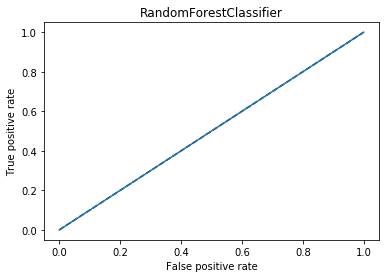

0.5

In [107]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test.malignant,RFC.predict(X_test_transformed))
auc_score

In [108]:
auc_score=roc_auc_score(y_test, classifier_ovr_RFCOne.predict(X_test_transformed))
auc_score

0.5

# Prediction on Testdata Partition 1 Random Forest Classifier

In [109]:
RFCOne = RandomForestClassifier(criterion = 'gini', max_depth = 10,max_features='sqrt',n_estimators= 40)
classifier_ovr_RFCOne = OneVsRestClassifier(RFCOne)
classifier_ovr_RFCOne.fit(X_raw_transformed, y)
pred_on_testdataRFCOne = classifier_ovr_RFCOne.predict(X_raw_test_transformed)
print(pred_on_testdataRFCOne)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


# Prediction on Testdata Partition 2 Random Forest Classifier

In [110]:
RFCOne = RandomForestClassifier(criterion = 'gini', max_depth = 10,max_features='sqrt',n_estimators= 40)
classifier_ovr_RFCOne = OneVsRestClassifier(RFCOne)
classifier_ovr_RFCOne.fit(X_raw_transformed, y)
pred_on_testdataRFCOne2 = classifier_ovr_RFCOne.predict(X_raw_test_transformed2)
print(pred_on_testdataRFCOne2)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


# KNN Classifier

In [111]:
import numpy as np
parameter = {'n_neighbors' : [1,2,4,5],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree'],
            'leaf_size': [30],
            'metric':['minkowski']}

In [112]:
cross_validation=KFold(5, shuffle =False)

In [113]:
GCV=HalvingGridSearchCV(KNeighborsClassifier(),parameter,cv=cross_validation)
#GCV=GridSearchCV(KNeighborsClassifier(),parameter,cv=cross_validation)

In [114]:
GCV.fit(X_train_transformed,y_train.malignant)
# Grid search CV applied to the Training Dataset 

C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-pac

C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-pac

HalvingGridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                    estimator=KNeighborsClassifier(),
                    param_grid={'algorithm': ['auto', 'ball_tree'],
                                'leaf_size': [30], 'metric': ['minkowski'],
                                'n_neighbors': [1, 2, 4, 5],
                                'weights': ['uniform', 'distance']},
                    refit=<function _refit_callable at 0x000000001DB3C620>)

In [115]:
GCV.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 5,
 'weights': 'distance'}

In [116]:
KNNC =  KNeighborsClassifier(algorithm = 'ball_tree',leaf_size = 30,metric = 'minkowski',n_neighbors=5,weights='distance')
KNNC.fit(X_train_transformed,y_train.malignant)
y_predKNNC = KNNC.predict(X_test_transformed)
print(f'Roc_auc at test:  = {roc_auc_score(y_test.malignant,y_predKNNC)}')
acc=accuracy_score(y_test.malignant,y_predKNNC)
print(acc*100)

C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


Roc_auc at test:  = 0.5181159420289855
89.58496476115897


In [117]:
KNNCOne = KNeighborsClassifier(algorithm = 'ball_tree',leaf_size = 30,metric = 'minkowski',n_neighbors=5,weights='distance')
classifier_ovr_KNNC = OneVsRestClassifier(KNNCOne)
classifier_ovr_KNNC.fit(X_train_transformed, y_train)
y_KNNC_Classifer_over = classifier_ovr_KNNC.predict(X_test_transformed)
print("ROC AUC Score Test:", roc_auc_score(y_test, y_KNNC_Classifer_over))
print(classification_report(y_test,y_KNNC_Classifer_over))

C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-pac

ROC AUC Score Test: 0.5197799157362215
              precision    recall  f1-score   support

           0       1.00      0.04      0.07       138
           1       1.00      0.09      0.17        11
           2       1.00      0.07      0.13        74
           3       0.00      0.00      0.00         2
           4       0.75      0.04      0.08        69
           5       0.00      0.00      0.00        10

   micro avg       0.93      0.05      0.09       304
   macro avg       0.62      0.04      0.07       304
weighted avg       0.90      0.05      0.09       304
 samples avg       0.00      0.00      0.00       304



C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
evaluate_score(y_test,y_KNNC_Classifer_over)

Hamming_loss : 3.7979639780736103
Accuracy : 88.88018794048551
Log_loss : 0.47190008575698805


In [119]:
y_pred_prob= KNNC.predict_proba(X_test_transformed)[:,1]
fpr,tpr,thresholds=roc_curve(y_test.malignant, y_predKNNC,pos_label= 1)

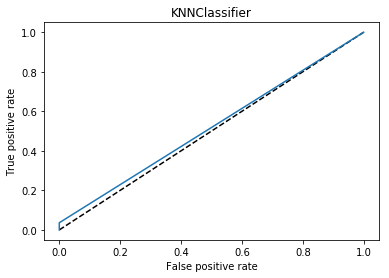

0.5181159420289855

In [120]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNNClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNNClassifier')
plt.show()
auc_score=roc_auc_score(y_test.malignant,KNNC.predict(X_test_transformed))
auc_score

In [121]:
auc_score=roc_auc_score(y_test, classifier_ovr_KNNC.predict(X_test_transformed))
auc_score

0.5197799157362215

# Prediction on Testset Partition 1 for KNN Classifiers

In [122]:
KNNCOne = KNeighborsClassifier(algorithm = 'ball_tree',leaf_size = 30,metric = 'minkowski',n_neighbors=5,weights='distance')
classifier_ovr_KNNC = OneVsRestClassifier(KNNCOne)
classifier_ovr_KNNC.fit(X_raw_transformed, y)
pred_on_testdataKNNC = classifier_ovr_KNNC.predict(X_raw_test_transformed)
print(pred_on_testdataKNNC)

C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-pac

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


# Prediction on Testset Partition 2 for KNN Classifiers

In [123]:
KNNCOne = KNeighborsClassifier(algorithm = 'ball_tree',leaf_size = 30,metric = 'minkowski',n_neighbors=5,weights='distance')
classifier_ovr_KNNC = OneVsRestClassifier(KNNCOne)
classifier_ovr_KNNC.fit(X_raw_transformed, y)
pred_on_testdataKNNC2 = classifier_ovr_KNNC.predict(X_raw_test_transformed2)
print(pred_on_testdataKNNC2)

C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\Lab\Anaconda3\lib\site-pac

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


# XGBoost Classifier

In [124]:
import numpy as np
parameter = {'max_depth' : [8,10],
             'learning_rate':[0.1,0.01],
             'gamma' : [0],     
             'n_estimators' : [12]}

In [125]:
cross_validation=KFold(5, shuffle =False)

In [126]:
GCV=HalvingGridSearchCV(XGBClassifier(),parameter,cv=cross_validation)

In [127]:
GCV.fit(X_train_transformed,y_train.malignant)
# Grid search CV applied to the Training Dataset 

HalvingGridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                    estimator=XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missin...
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            

In [128]:
GCV.best_params_

{'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 12}

# Accuracy and Roc Score on y_test_malignant

In [129]:
XGBC = XGBClassifier(gamma = 0,learning_rate = 0.01,max_depth = 10, n_estimators=12)
XGBC.fit(X_train_transformed,y_train.malignant)
y_predXGBC = XGBC.predict(X_test_transformed)
print(f'Roc_auc at test:  = {roc_auc_score(y_test.malignant,y_predXGBC)}')
acc=accuracy_score(y_test.malignant,y_predXGBC)
print(acc*100)

Roc_auc at test:  = 0.728811187031594
93.65700861393891


# OneVsRestClassifier(XGBoost Classifier) : To predict all multiclass labels on y_test

In [130]:
XGBC_One =  XGBClassifier(gamma = 0,learning_rate = 0.01,max_depth = 10, n_estimators=12)
classifier_ovr_XGBC_One = OneVsRestClassifier(XGBC_One)
classifier_ovr_XGBC_One.fit(X_train_transformed, y_train)
y_XGBC_One_pred = classifier_ovr_XGBC_One.predict(X_test_transformed)
print("ROC AUC Score Test:", roc_auc_score(y_test, y_XGBC_One_pred))
print(classification_report(y_test,y_XGBC_One_pred))

ROC AUC Score Test: 0.6732198509612464
              precision    recall  f1-score   support

           0       0.90      0.46      0.61       138
           1       0.30      0.27      0.29        11
           2       0.90      0.70      0.79        74
           3       0.00      0.00      0.00         2
           4       0.60      0.48      0.53        69
           5       0.29      0.20      0.24        10

   micro avg       0.77      0.51      0.61       304
   macro avg       0.50      0.35      0.41       304
weighted avg       0.78      0.51      0.61       304
 samples avg       0.05      0.05      0.04       304



C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
evaluate_score(y_test,y_XGBC_One_pred)

Hamming_loss : 2.5711302531975986
Accuracy : 89.97650743931088
Log_loss : 1.3245390463577462


# AUC ROC Curve & Score for XGBoost Classifier

In [132]:
y_pred_prob= RFC.predict_proba(X_test_transformed)[:,1]
fpr,tpr,thresholds=roc_curve(y_test.malignant, y_predXGBC,pos_label= 1)

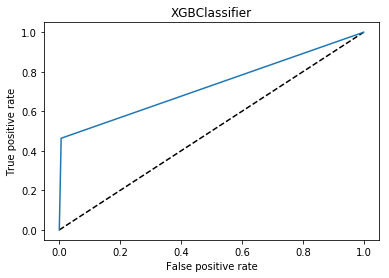

0.728811187031594

In [133]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBClassifier')
plt.show()
auc_score=roc_auc_score(y_test.malignant,XGBC.predict(X_test_transformed))
auc_score

In [134]:
auc_score=roc_auc_score(y_test, classifier_ovr_XGBC_One.predict(X_test_transformed))
auc_score

0.6732198509612464

# Prediction on Testset Partition 1 for XGBC Classifiers

In [135]:
XGBC_One = XGBClassifier(gamma = 0,learning_rate = 0.01,max_depth = 10, n_estimators=12)
classifier_ovr_XGBC_One = OneVsRestClassifier(XGBC_One)
classifier_ovr_XGBC_One.fit(X_raw_transformed, y)
pred_on_testdataXGBCOne = classifier_ovr_XGBC_One.predict(X_raw_test_transformed)
print(pred_on_testdataXGBCOne)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


# Prediction on Testset Partition 2 for XGBC Classifiers

In [136]:
XGBC_One =  XGBClassifier(gamma = 0,learning_rate = 0.01,max_depth = 10, n_estimators=12)
classifier_ovr_XGBC_One = OneVsRestClassifier(XGBC_One)
classifier_ovr_XGBC_One.fit(X_raw_transformed, y)
pred_on_testdataXGBCOne2 = classifier_ovr_XGBC_One.predict(X_raw_test_transformed2)
print(pred_on_testdataXGBCOne2)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [137]:
pred_on_testdataXGBCOne2 = pd.DataFrame(pred_on_testdataXGBCOne2, columns = ['malignant','highly_malignant','rude','threat','abuse','loathe'])

In [138]:
pred_on_testdataXGBCOne2

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
7995,0,0,0,0,0,0
7996,1,0,1,0,1,0
7997,0,0,0,0,0,0
7998,0,0,0,0,0,0


In [139]:
pred_on_testdataXGBCOne2.to_csv('pred_on_testdataXGBCOne2.csv')

# Hamming & Log Loss Plot for Above ML Algo :
- Humming Loss : Is the fraction of the wrong labels to the total number of labels,Since hamming loss is designed for multi class while Precision, Recall, F1-Measure are designed for the binary class, it is better to compare the last one to Accuracy Also specifically for imbalanced problems, accuracy is a problematic metric. The Hamming loss lower being better.

- Log-Loss:  is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.but log-loss is still a good metric for comparing models. For any given problem, a lower log-loss value means better predictions.


In [140]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import itertools

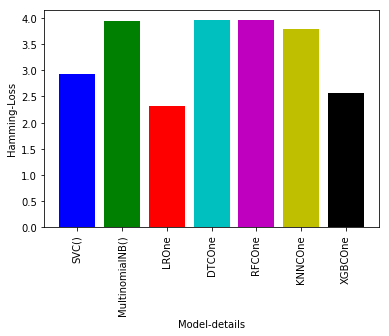

In [141]:
x = ['SVC()','MultinomialNB()', 'LROne', 'DTCOne','RFCOne','KNNCOne','XGBCOne']
y = [2.93,3.94,2.31,3.96,3.96,3.79,2.57]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.ylabel('Hamming-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

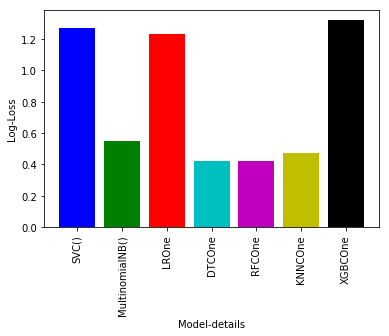

In [142]:
x = ['SVC()','MultinomialNB()', 'LROne', 'DTCOne','RFCOne','KNNCOne','XGBCOne']
y = [1.27,0.55,1.23,0.42,0.42,0.47,1.32]
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
plt.ylabel('Log-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

# Best Model Selection :

- So, if we compare models based only on Log Loss than DecsionTree and RandomForest Classification model shows low Log Loss Values.
- The only logistic regression shows best AUC Curve & AUC Score as well as high accuracy among all followed by XGBoost Classifier.
- From Further analysis we can see Logistic regression shows low humming loss and high accuracy as well high AUC Score followed by XGBoost Classifier.
- From Above Analysis Logistic regression will perform best among rest other ML Algorithm. 
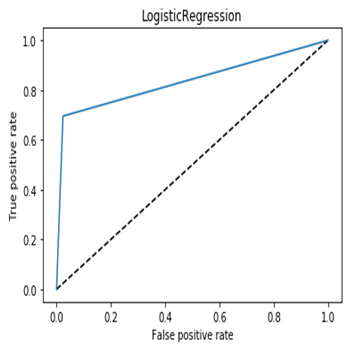